# Introduction

The Bellabeat market analysis is a capstone project for the Google Data Analytics Programme on Coursera.

Bellabeat is a high-tech company that prides itself as ‘the go-to wellness brand for women with an ecosystem of products and services focused on women’s health’. They manufacture health-focused smart products that collect data on activity, sleep, stress and hydration levels as well as the reproductive health of women with the goal of empowering them with an understanding of their health and hitherto unknown habits.

Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website. The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.

### Products
Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.

Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.

Bellabeat membership: Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

 

It is envisaged that a focus on a Bellabeat products and the analysis of the FitBit Fitness Tracker Data will help key stakeholders at Bellabeat to gain insights into how people are already using their smart devices and reveal more opportunities for growth.

 

In order to adequately analyze these data to answer the key business questions and make recommendations, I will follow the key steps of Data Analysis Process: Ask, Prepare, Process, Analyze, Share and Act

# Ask

### Business Task
The aim of this analysis is to gain an insight into how customers use the Fitness aim and the functionality of the app. ALso, the trendline of users results to aid in recommendations for fitness goals would be considered.

### Questions

What are some trends in smart device usage?

How could these trends apply to Bellabeat customers?

How could these trends help influence Bellabeat marketing strategy?

 

### Key Stakeholders:

· Urška Sršen — Bellabeat’s co-founder and Chief Creative Officer

· Sando Mur — Mathematician and Bellabeat’s co-founder;

· Bellabeat marketing analytics team — A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

# Prepare

This analysis is focused on the daily activities tracking and the effect on the users. Thus, the datasets used are;
dailyActivity_merged;
dailyCalories_merged;
sleepDay_merged

### Data Source
Urška Sršen approved the use of public data that explores smart device users’ daily habits. Therefore, the dataset used in this project will be the FitBit Fitness Tracker Data which is available on Kaggle.

###  Data Assessment for credibility & integrity

To determine the credibility, reliability and integrity of the dataset presented, I used the ROCCC (Reliable, Original, Comprehensive, Current & Cited) data test model.

Reliability: (LOW) There were only 30 individuals involved in this survey. This is a very small sample size for making far-reaching analysis & recommendation for the required business task.

Originality: (LOW) Data is sourced from a third-party survey by Amazon Mechanical Turk.

Comprehensive: (MEDIUM) – Data is within the parameters required for the Bellabeat’s business task.

Current: (LOW) The dataset was sourced back in 2016 (over 8 years ago) and covered a short period of March – May 2016. It is my opinion that this data is somewhat stale given the pace of better and improved health data tracking methods over the years. More so, a 2-month data collection window is so short for the highly dynamic data type.

Cited: (MEDIUM) The third-party dataset was available by Mobius via Kaggle.import pandas as pd

In [43]:
import numpy as np
from IPython.display import Image
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing datasets

In [44]:
daily_activity = pd.read_csv("dailyActivity_merged.csv")
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [45]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [46]:
daily_calories = pd.read_csv("dailyCalories_merged.csv")


In [47]:
daily_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [48]:
sleep_day = pd.read_csv("sleepDay_merged.csv")
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [49]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


# Process

The tool used for this analysis is the Python software on Jupyter notebook. 

### Checking for missing values

In [10]:
daily_activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [11]:
daily_calories.isnull().sum()

Id             0
ActivityDay    0
Calories       0
dtype: int64

In [12]:
sleep_day.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [52]:
#Change column name "ActvityDay" to "ActivityDate" for uniformity

daily_calories.rename(columns ={'ActivityDay':'ActivityDate'}, inplace=True)
sleep_day.rename(columns ={'SleepDay':'ActivityDate'}, inplace=True)

In [53]:
# convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [54]:
daily_calories["ActivityDate"] = pd.to_datetime(daily_calories["ActivityDate"], format="%m/%d/%Y")

In [104]:
#Formatting the ActivityDate format to DateTime format
sleep_day = sleep_day.assign(ActivityDate = pd.to_datetime(sleep_day['ActivityDate']))
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   ActivityDate        413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
 5   DayOfWeek           413 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 19.5+ KB


# Analyze

In [55]:
# Creating a column for Day of Week
daily_activity['DayOfWeek'] = daily_activity['ActivityDate'].dt.day_name()
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,Sunday
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,Monday
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,Tuesday
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786,Wednesday
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775,Thursday


In [71]:
# Combine the activity minutes and convert to hour
daily_activity["total_activity_mins"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"] + daily_activity["SedentaryMinutes"]
daily_activity["total_activity_hours"] = round(daily_activity["total_activity_mins"]/60)
daily_activity.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,total_activity_mins,total_activity_hours
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094,18.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,1033,17.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,1440,24.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,998,17.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,1040,17.0


In [73]:
# Creating Day of week column for the remaining dataframe.
daily_calories['DayOfWeek'] = daily_calories['ActivityDate'].dt.day_name()
sleep_day['DayOfWeek'] = sleep_day['ActivityDate'].dt.day_name()

Since all dataset are identified by Id, they will be merged.

In [89]:
# Merging datasets together
merged_data = pd.merge(left=daily_activity, right = sleep_day,how='inner', on=['Id', 'ActivityDate', 'DayOfWeek'] )
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        413 non-null    int64         
 1   ActivityDate              413 non-null    datetime64[ns]
 2   TotalSteps                413 non-null    int64         
 3   TotalDistance             413 non-null    float64       
 4   TrackerDistance           413 non-null    float64       
 5   LoggedActivitiesDistance  413 non-null    float64       
 6   VeryActiveDistance        413 non-null    float64       
 7   ModeratelyActiveDistance  413 non-null    float64       
 8   LightActiveDistance       413 non-null    float64       
 9   SedentaryActiveDistance   413 non-null    float64       
 10  VeryActiveMinutes         413 non-null    int64         
 11  FairlyActiveMinutes       413 non-null    int64         
 12  LightlyActiveMinutes  

In [90]:
#Checking for duplicates
merged_data.duplicated().sum()

3

In [91]:
# Dropping duplicates
merged_data.drop_duplicates(inplace = True)

In [92]:
# Confirming duplicates were dropped successfully
merged_data.duplicated().sum()

0

In [93]:
merged_data= pd.merge(left= merged_data, right = daily_calories,how='inner', on=['Id', 'ActivityDate','DayOfWeek', 'Calories'] )
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 409
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        410 non-null    int64         
 1   ActivityDate              410 non-null    datetime64[ns]
 2   TotalSteps                410 non-null    int64         
 3   TotalDistance             410 non-null    float64       
 4   TrackerDistance           410 non-null    float64       
 5   LoggedActivitiesDistance  410 non-null    float64       
 6   VeryActiveDistance        410 non-null    float64       
 7   ModeratelyActiveDistance  410 non-null    float64       
 8   LightActiveDistance       410 non-null    float64       
 9   SedentaryActiveDistance   410 non-null    float64       
 10  VeryActiveMinutes         410 non-null    int64         
 11  FairlyActiveMinutes       410 non-null    int64         
 12  LightlyActiveMinutes  

In [94]:
#Checking for duplicates
merged_data.duplicated().sum()

0

In [95]:
merged_data.columns=map(str.lower,merged_data.columns)
pd.set_option('display.max_columns', None)
merged_data.head()

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,dayofweek,total_activity_mins,total_activity_hours,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094,18.0,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,1033,17.0,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,998,17.0,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,1040,17.0,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,Sunday,761,13.0,1,700,712


In [96]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 409
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        410 non-null    int64         
 1   activitydate              410 non-null    datetime64[ns]
 2   totalsteps                410 non-null    int64         
 3   totaldistance             410 non-null    float64       
 4   trackerdistance           410 non-null    float64       
 5   loggedactivitiesdistance  410 non-null    float64       
 6   veryactivedistance        410 non-null    float64       
 7   moderatelyactivedistance  410 non-null    float64       
 8   lightactivedistance       410 non-null    float64       
 9   sedentaryactivedistance   410 non-null    float64       
 10  veryactiveminutes         410 non-null    int64         
 11  fairlyactiveminutes       410 non-null    int64         
 12  lightlyactiveminutes  

In [103]:
# Getting the summary of the dataset
merged_data.describe()

,id,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,total_activity_mins,total_activity_hours,totalsleeprecords,totalminutesasleep,totaltimeinbed
count,4.100000e+02,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,8514.909756,6.012390,6.007366,0.108867,1.446220,0.743902,3.791122,0.000927,25.046341,17.924390,216.541463,712.100000,2389.295122,971.612195,16.195122,1.119512,419.173171,458.482927
std,2.060863e+09,4157.375584,3.043946,3.039279,0.505523,1.992591,0.999806,1.720788,0.008685,36.218237,22.418593,86.705299,166.179395,758.435040,167.523522,2.810385,0.346636,118.635918,127.455140
min,1.503960e+09,17.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,2.000000,0.000000,257.000000,2.000000,0.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,5188.750000,3.592500,3.592500,0.000000,0.000000,0.000000,2.540000,0.000000,0.000000,0.000000,158.000000,631.250000,1841.000000,906.250000,15.000000,1.000000,361.000000,403.750000
50%,4.702922e+09,8913.000000,6.270000,6.270000,0.000000,0.570000,0.420000,3.665000,0.000000,9.000000,11.000000,208.000000,717.000000,2207.000000,983.000000,16.000000,1.000000,432.500000,463.000000
75%,6.962181e+09,11370.250000,8.005000,7.950000,0.000000,2.360000,1.037500,4.917500,0.000000,38.000000,26.750000,263.000000,782.750000,2920.000000,1042.000000,17.000000,1.000000,490.000000,526.000000
max,8.792010e+09,22770.000000,17.540001,17.540001,4.081692,12.540000,6.480000,9.480000,0.110000,210.000000,143.000000,518.000000,1265.000000,4900.000000,1398.000000,23.000000,3.000000,796.000000,961.000000


# Share

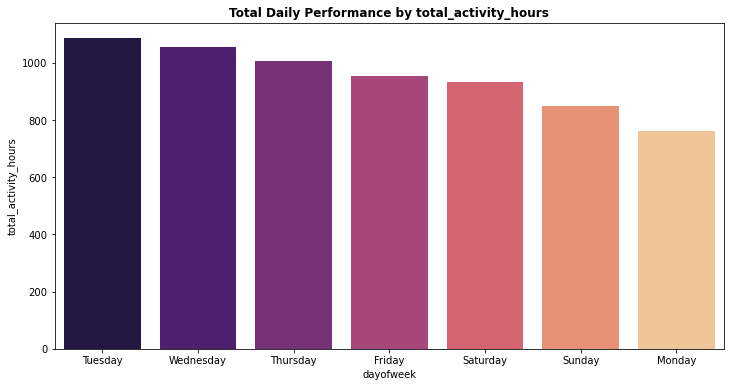

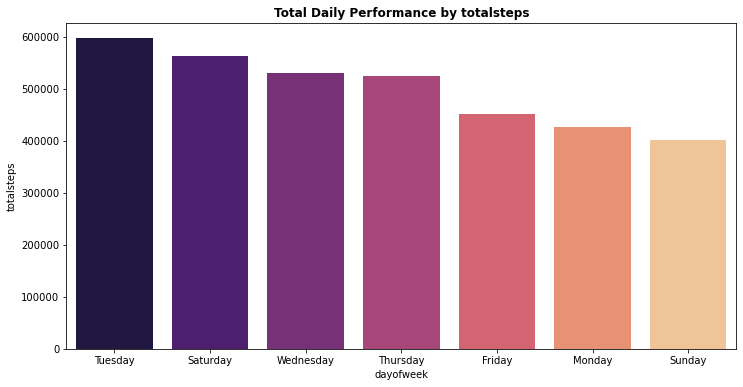

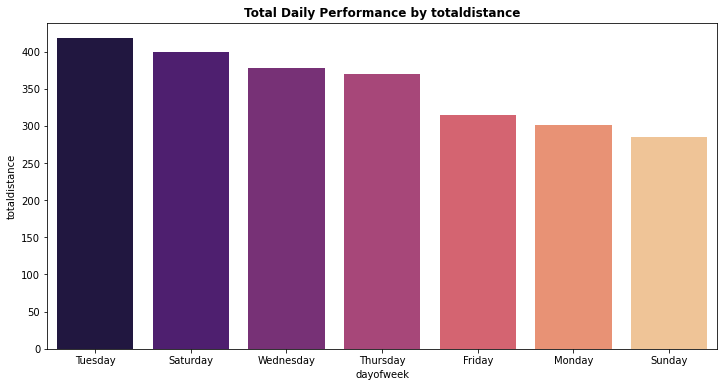

In [81]:
merged_data = merged_data.groupby(merged_data.dayofweek).agg({'total_activity_hours':'sum','totalsteps':'sum','totaldistance': 'sum'}).reset_index()

# Check the top breeds
for i in ['total_activity_hours','totalsteps', 'totaldistance']:
    fig, ax = plt.subplots(figsize = (12,6))
    ax = sns.barplot(x = 'dayofweek', y = i, data = merged_data.sort_values(i, \
    ascending = False).iloc[:10], palette = 'magma')
    ax.set_title('Total Daily Performance by'+" " + i, weight = 'bold')

The plots above shows the daily performance of the users in terms of total time spent on work out, total distance covered and total steps taken.
There is a direct/exact trend for total distance and total steps, however this does not translate to the total activity minutes. This could be as a result of users taking large number of steps and covering good distances within a short period of time

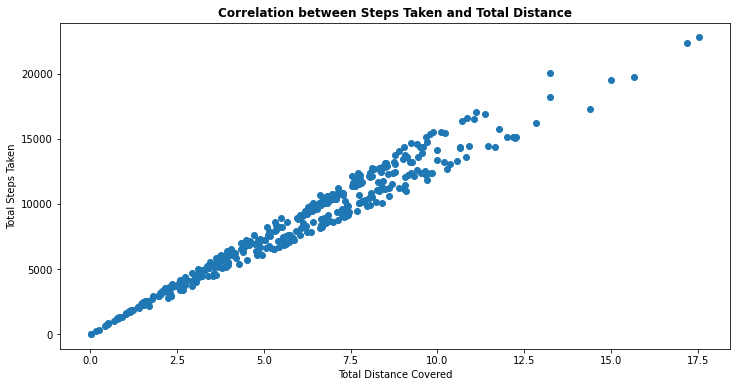

In [105]:
plt.figure(figsize=[12,6])
plt.scatter(data=merged_data, x='totaldistance', y='totalsteps')
plt.xlabel('Total Distance Covered')
plt.ylabel('Total Steps Taken')
plt.title('Correlation between Steps Taken and Total Distance', weight='bold')
plt.show;

This plot was done to confirm the relation between total distance and total steps and from the plot, there is a positive correlation. The spread of the plot also indicates that the users are either within the same fitness level or about the same height or a combination of both.

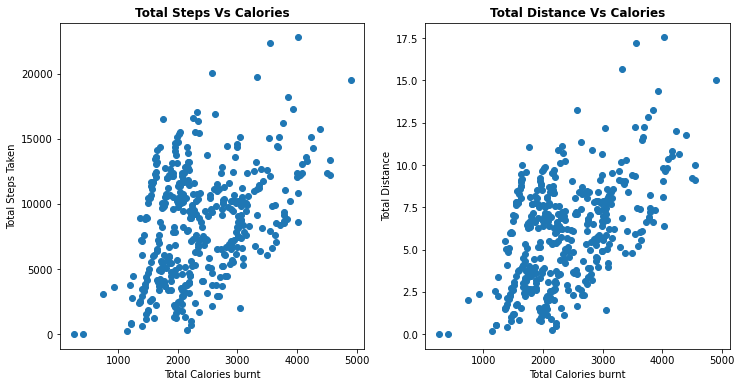

In [97]:
# Showing the effect of steps taken on calories
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.scatter(data=merged_data, x='calories', y='totalsteps')
plt.xlabel('Total Calories burnt')
plt.ylabel('Total Steps Taken')
plt.title('Total Steps Vs Calories', weight = 'bold')

plt.subplot(1,2,2)
plt.scatter(data= merged_data, x='calories', y='totaldistance')
plt.xlabel('Total Calories burnt')
plt.ylabel('Total Distance')
plt.title('Total Distance Vs Calories', weight = 'bold')
plt.show();

Going forward, I chcecked for the effect of both distance covered and the steps taken on total calories burnt. Both have positive correlations indicating that the more distance covered and steps covered, the more the amount of calories burnt. 

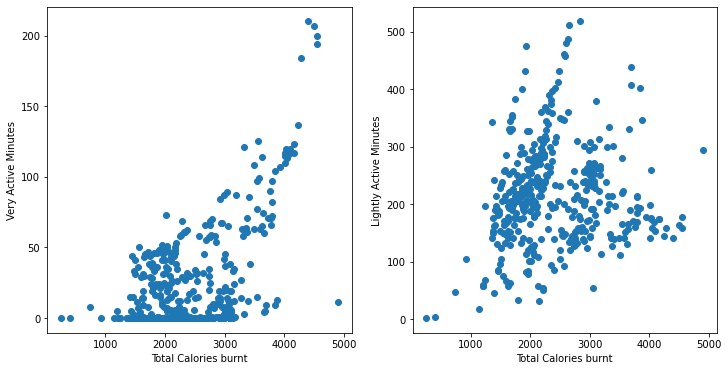

In [98]:
# Plot comparing Very Active and Lightly Active
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.scatter(data=merged_data, x='calories', y='veryactiveminutes')
plt.xlabel('Total Calories burnt')
plt.ylabel('Very Active Minutes')

plt.subplot(1,2,2)
plt.scatter(data=merged_data, x='calories', y='lightlyactiveminutes')
plt.xlabel('Total Calories burnt')
plt.ylabel('Lightly Active Minutes')
plt.show();

These plots displayed the effect of activeness on calories. The plots showed that lesser time is spent to burn calories when very active compared to being lightly active. This can be attributed to the intensity of the activity.

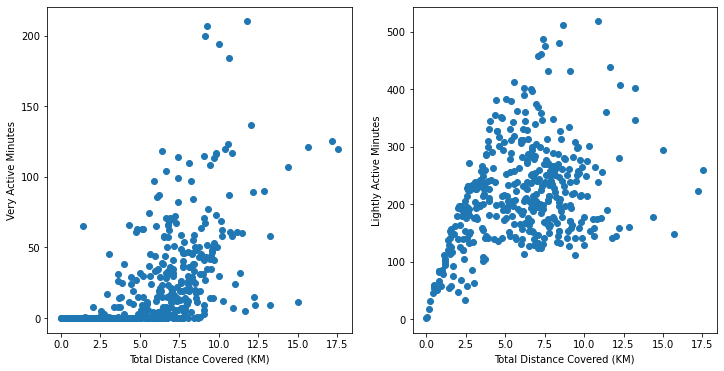

In [99]:
# Plot comparing Very Active and Lightly Active
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.scatter(data=merged_data, x='totaldistance', y='veryactiveminutes')
plt.xlabel('Total Distance Covered (KM)')
plt.ylabel('Very Active Minutes')

plt.subplot(1,2,2)
plt.scatter(data=merged_data, x='totaldistance', y='lightlyactiveminutes')
plt.xlabel('Total Distance Covered (KM)')
plt.ylabel('Lightly Active Minutes')
plt.show();

From the plots, it can be seen that more distance is covered in the lightly active minutes, although more time is taken. However, the very active minutes showed that a good amount of distance is covered within short time however not as much as the lightly active minutes. This can be attributed to exhausted from high intensity activity.

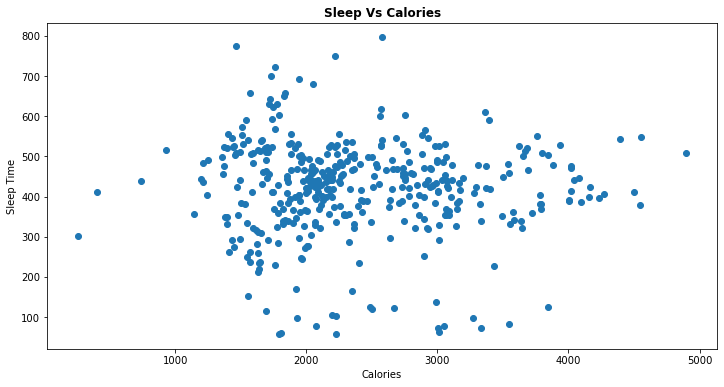

In [100]:
plt.figure(figsize=[12,6])
plt.scatter(data=merged_data, x='calories', y='totalminutesasleep')
plt.xlabel('Calories')
plt.ylabel('Sleep Time')
plt.title('Sleep Vs Calories', weight='bold')
plt.show;

Sleep has an average effect on calories. However, it goes without saying that higher time of sleep correlates with lesser calories burnt. This could be attributed to spending more time sleeping and less time for workout.

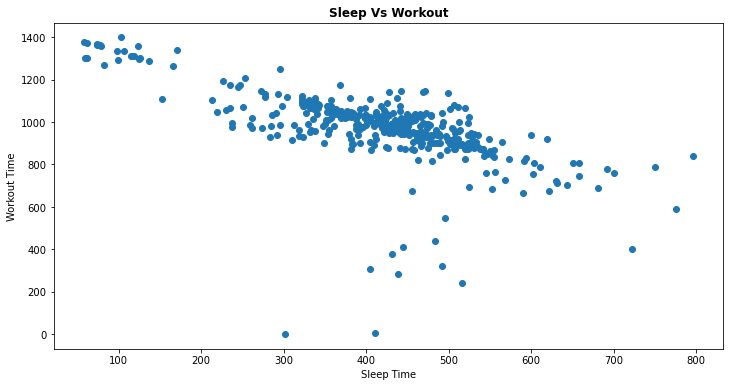

In [101]:
plt.figure(figsize=[12,6])
plt.scatter(data=merged_data, x='totalminutesasleep', y='total_activity_mins')
plt.xlabel('Sleep Time')
plt.ylabel('Workout Time')
plt.title('Sleep Vs Workout', weight='bold')
plt.show;

The previous plot hinted on the possibility of sleep time affecting amount of work out time. This plot confirms that suspicion, as it is visible to see the negative correlation between sleep and workout.

## Act

### Key Findings from analysis done
1. Taking more steps and covering more distance generally has more effect on burning calories.
2. Engaging highly intense activity causes users to spend lesser time burning about the same amount of calories as those who engage in lighter activities but would spend longer time.
3. Too little or too much sleep can lead to less burning of calories. Therefore, an average amount of sleep shpuld be maintained.

### Recommendations for BellaBeat
1. From the bar chart, there is a decline in number of steps are the weekends encroach. Users can be sent a reminder notification to increase their steps and maintain fitness.
2. Standard sleep time can be recommended to users based on their data.
3. Total number of steps to be taken by a user daily can be recommended based on their individual goals for calories to be burned.

## Note
The available dataset was quite small and thus limited the analysis. A larger dataset would have created room for better insight.